In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [6]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
# shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

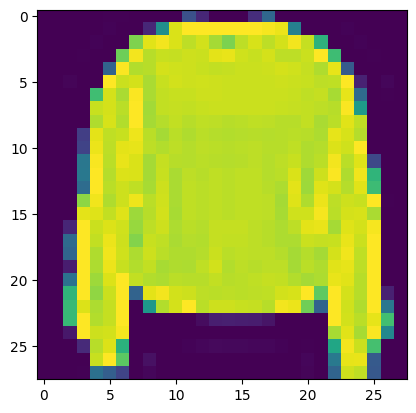

In [12]:
plt.imshow(train_data[7  ])

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Coat')

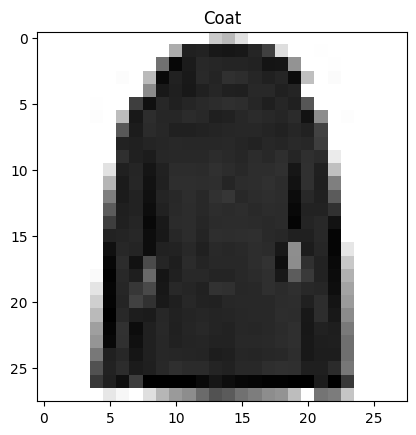

In [20]:
index=2000

plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

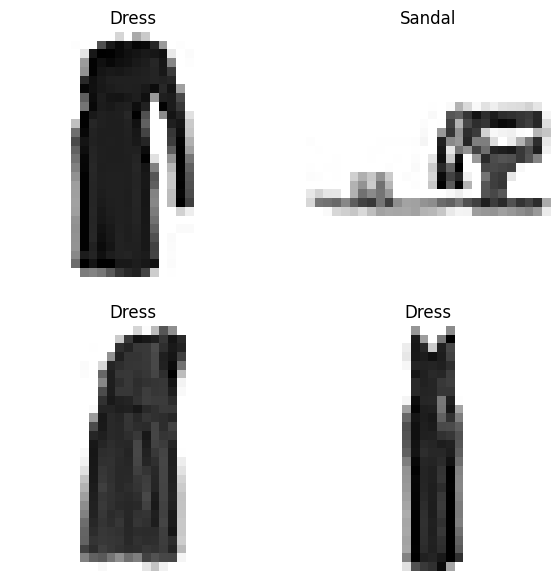

In [27]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

# Building a model

In [32]:
# input shape is 28/28  -- see flatten layer
# output is 10 (one per class)
#loss funcrtion tf.keras.losses.CategoricalCrossentropy() if values one_hot encoded   SparseCategoricalCrossentropy  if integer
# output layer activation Softmax not sigmoid

In [31]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
])
flatten_model.output_shape

(None, 784)

In [38]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history_11 = model_11.fit(
    train_data, train_labels, epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1793 - loss: 2.1874 - val_accuracy: 0.2937 - val_loss: 1.7877
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3182 - loss: 1.6545 - val_accuracy: 0.3884 - val_loss: 1.3745
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4359 - loss: 1.3352 - val_accuracy: 0.4807 - val_loss: 1.2482
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5398 - loss: 1.1927 - val_accuracy: 0.5690 - val_loss: 1.0398
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5736 - loss: 1.0777 - val_accuracy: 0.6151 - val_loss: 0.9747
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6194 - loss: 0.9602 - val_accuracy: 0.5938 - val_loss: 0.9787
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6265 - loss: 0.9256 - val_accuracy: 0.6409 - val_loss: 0.9075
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6281 - loss: 0.9289 -

In [34]:
model_11.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

#Neural networks prefer to be scaled or normalized

We can normalize the data by dividing by train_data.max() 

In [36]:
test_data.min(), test_data.max()

(np.uint8(0), np.uint8(255))

In [35]:
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

In [7]:
train_data_norm = train_data /  train_data.max()
test_data_norm = test_data / test_data.max()

train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [39]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history_12 = model_12.fit(
    train_data_norm, train_labels, epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4389 - loss: 1.4788 - val_accuracy: 0.7366 - val_loss: 0.8454
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7445 - loss: 0.8082 - val_accuracy: 0.7592 - val_loss: 0.7501
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7618 - loss: 0.7291 - val_accuracy: 0.7692 - val_loss: 0.7067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7702 - loss: 0.6872 - val_accuracy: 0.7812 - val_loss: 0.6639
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7905 - loss: 0.6279 - val_accuracy: 0.7967 - val_loss: 0.6232
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7994 - loss: 0.5933 - val_accuracy: 0.8039 - val_loss: 0.6019
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8051 - loss: 0.5739 - val_accuracy: 0.8068 - val_loss: 0.5920
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8095 - loss: 0.5608 - 

<Axes: title={'center': 'normalized Data'}>

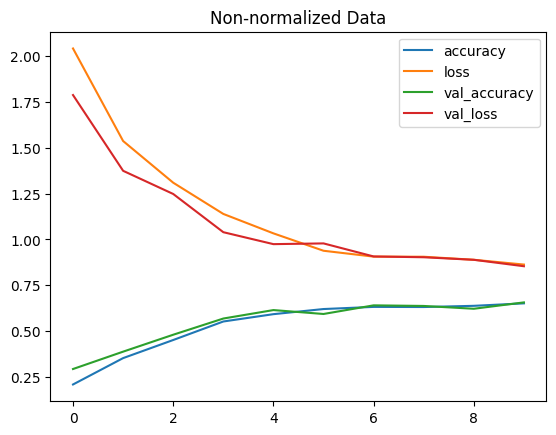

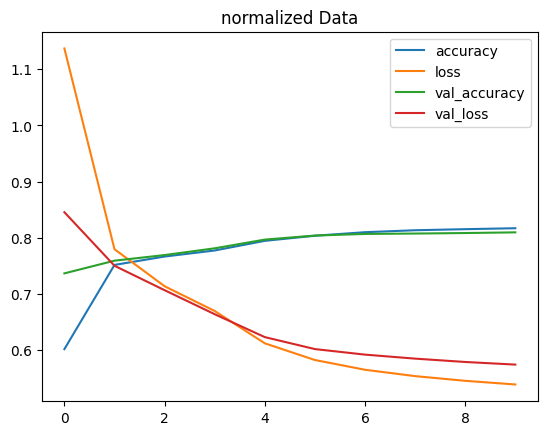

In [44]:
pd.DataFrame(non_norm_history_11.history).plot(title='Non-normalized Data')
pd.DataFrame(norm_history_12.history).plot(title='normalized Data')

In [43]:
type(non_norm_history_11)

keras.src.callbacks.history.History

In [8]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_13 = model_13.fit(
    train_data_norm, train_labels, epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4451 - loss: 1.5173 - val_accuracy: 0.7416 - val_loss: 0.7659 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7571 - loss: 0.7158 - val_accuracy: 0.7741 - val_loss: 0.6659 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7752 - loss: 0.6473 - val_accuracy: 0.7794 - val_loss: 0.6404 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7833 - loss: 0.6213 - val_accuracy: 0.7853 - val_loss: 0.6172 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7900 - loss: 0.6028 - val_accuracy: 0.7918 - val_loss: 0.6027 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7956 - loss: 0.5889 - val_accuracy: 0.7947 - val_loss: 0.5939 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8008 - l

Text(0.5, 1.0, 'Finding the ideal learning rate')

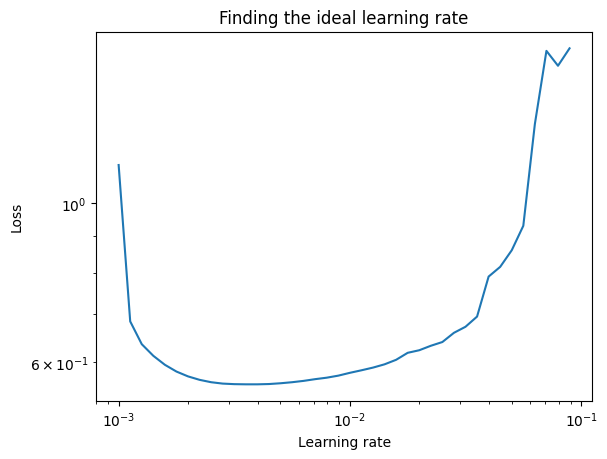

In [10]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogy(lrs, history_13.history['loss'])
plt.xscale('log') 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [11]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),)

history_14 = model_14.fit(train_data_norm, train_labels, epochs=20, 
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.5314 - val_loss: 0.8232
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7766 - val_loss: 0.7117
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6867 - val_loss: 0.6800
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6564 - val_loss: 0.6642
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6394 - val_loss: 0.6555
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6283 - val_loss: 0.6472
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6205 - val_loss: 0.6425
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6143 - val_loss: 0.6391
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6096 - val_loss: 0.6368
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6059 - val_loss: 0.6348
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6027 - val_loss: 0.6327
Epoch 12/20
1875/1875 ━━━━━━━━

In [12]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    cm = confusion_matrix(y_true, y_pred)
    
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    
    n_classes = cm.shape[0]
    
    fig, ax = plt.subplots(figsize=figsize)
    # create a matrix plot
    
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    if classes:
        labels = classes
    else: 
        labels = np.arange(cm.shape[0])
    
    ax.set(
        xlabel="Predictted Label", 
        ylabel="True Label", 
        title='Confusion Matrix',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels 
    )
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    threshold = (cm.max() + cm.min()) / 2.
    
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, f"{cm[i,]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black"
        )

In [14]:
y_probs = model_14.predict(test_data_norm)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.1301427e-07, 1.0277932e-17, 3.8007895e-09, 6.0979520e-12,
        2.8611455e-31, 1.3867493e-01, 2.6869291e-06, 1.1265703e-01,
        7.5437938e-04, 7.4791086e-01],
       [1.5934739e-04, 1.1379084e-14, 9.4059181e-01, 6.5988308e-09,
        2.1833500e-02, 9.1056259e-29, 3.7393183e-02, 2.6351857e-14,
        2.2107617e-05, 4.4655972e-09],
       [4.0169933e-04, 9.9919873e-01, 5.6714690e-08, 3.9853243e-04,
        2.5941123e-08, 7.0262971e-32, 9.6374936e-07, 1.4180684e-16,
        1.3434514e-15, 2.2152718e-23],
       [5.1680906e-04, 9.9534237e-01, 2.0006991e-07, 4.1349675e-03,
        3.0251604e-07, 2.9027237e-27, 5.3820927e-06, 1.0396270e-13,
        3.4861841e-13, 8.9867988e-21],
       [1.8630734e-01, 7.5368662e-05, 3.0753270e-01, 6.4318809e-03,
        3.7581023e-02, 7.1371238e-12, 4.5988795e-01, 2.1633002e-06,
        2.1778869e-03, 3.7014452e-06]], dtype=float32)

In [17]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.1301427e-07, 1.0277932e-17, 3.8007895e-09, 6.0979520e-12,
        2.8611455e-31, 1.3867493e-01, 2.6869291e-06, 1.1265703e-01,
        7.5437938e-04, 7.4791086e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels, y_pred=np.argmax(y_probs, axis=1))

array([[784,   6,  20,  72,   2,   2,  99,   0,  14,   1],
       [ 23, 925,   2,  39,   2,   0,   8,   0,   1,   0],
       [ 44,   0, 596,  16,  98,   0, 237,   0,   9,   0],
       [ 43,  22,   1, 824,  26,   0,  74,   0,  10,   0],
       [  4,   0, 150,  50, 630,   0, 148,   0,  18,   0],
       [  0,   0,   0,   0,   0, 887,   0,  61,  10,  42],
       [194,   0, 160,  53, 139,   2, 430,   0,  22,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   2,  31],
       [  3,   1,  36,  15,  12,   7,  19,  11, 892,   4],
       [  0,   0,   0,   0,   0,  30,   1,  59,   9, 901]])

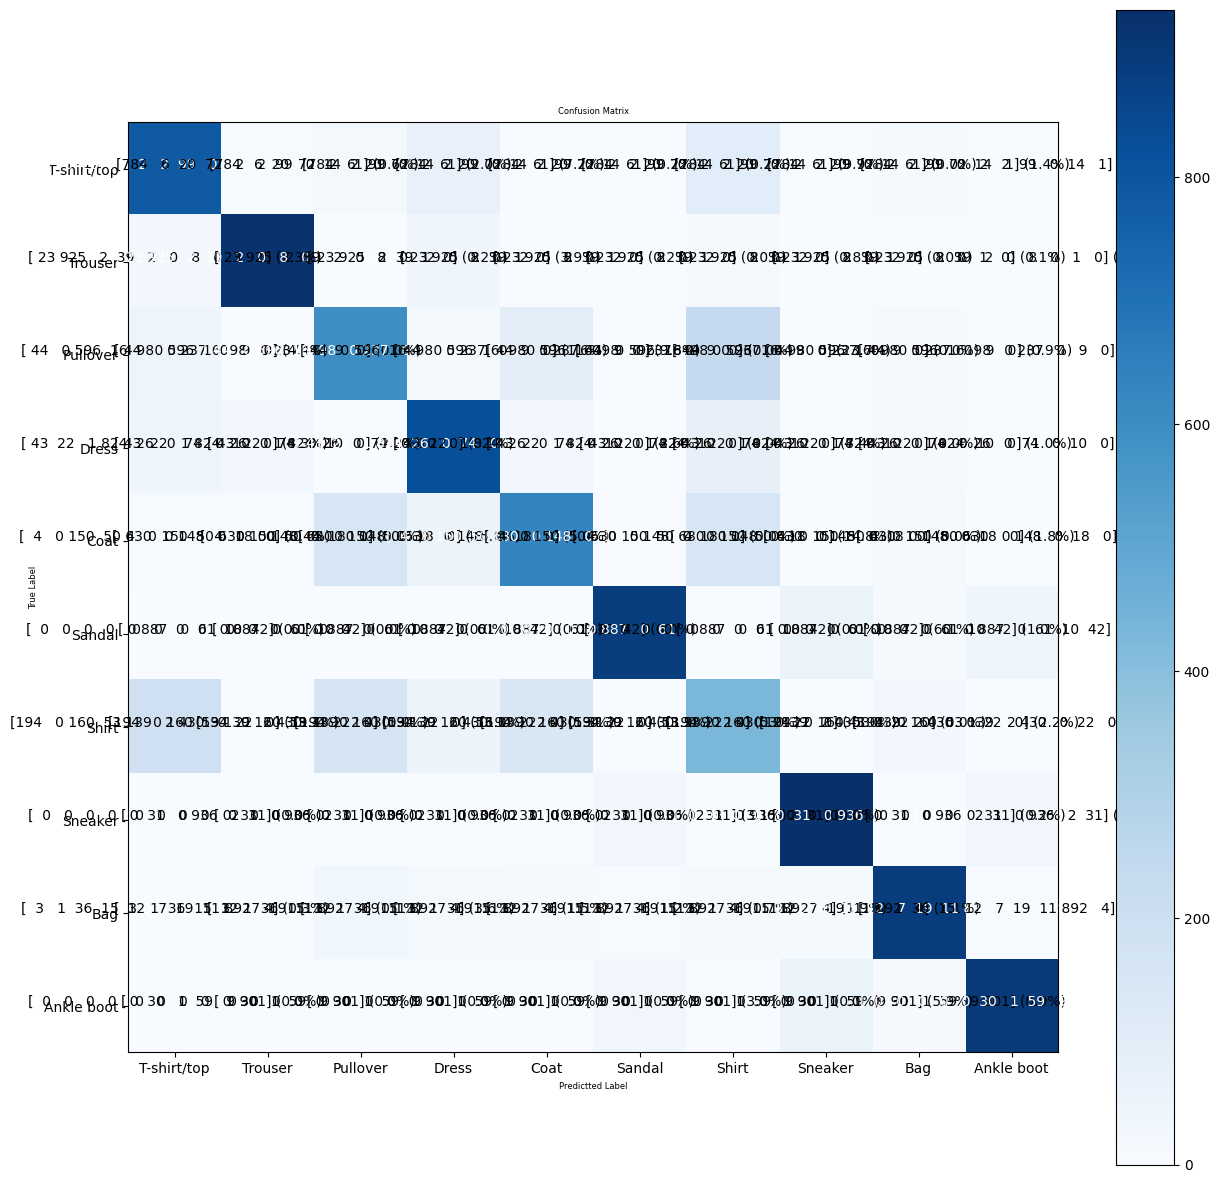

In [23]:
make_confusion_matrix(y_true=test_labels, y_pred=np.argmax(y_probs, axis=1), classes=class_names, text_size=6, figsize=(15,15))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


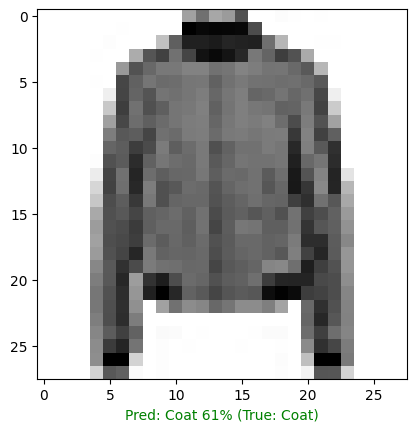

In [37]:
import random

def plot_random_image(model, images, true_labels, classes):
    '''
    picks a random image, plots it and labels it with a prediction and truth label
    '''
    
    i = random.randint(0, len(images))
    
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = class_names[np.argmax(pred_probs)]
    true_label = classes[true_labels[i]]
    
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    if pred_label==true_label:
        color='green'
    else:
        color='red'
        
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)
    
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

In [38]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-7.5299817e-01,  5.1975250e-04,  6.0784513e-01,  5.7231796e-01],
        [-7.1600688e-01, -7.7141963e-02, -4.2529784e-02, -5.7995325e-01],
        [-8.1428796e-01, -8.1174150e-03, -8.0486375e-01,  3.8554230e-01],
        ...,
        [ 2.1446575e-01,  7.2531395e-02, -3.6197436e-01, -4.4142976e-02],
        [ 3.7739718e-01, -9.5544299e-03, -3.5892969e-01, -3.7170106e-01],
        [ 9.5070228e-02, -3.4484532e-02, -1.7702790e-01,  9.7960666e-02]],
       dtype=float32),
 (784, 4))

In [39]:
biases

array([ 0.24396268, -0.03299628,  0.2765623 ,  0.33364615], dtype=float32)

In [40]:
biases.shape

(4,)

In [ ]:
# every neuron has a bias vector. Each of these is paired with a weight matrix. 
# Bias vector gets initialized as zeros (at least in the case of a tensorflow dense layer)
# bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [41]:
model_14.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

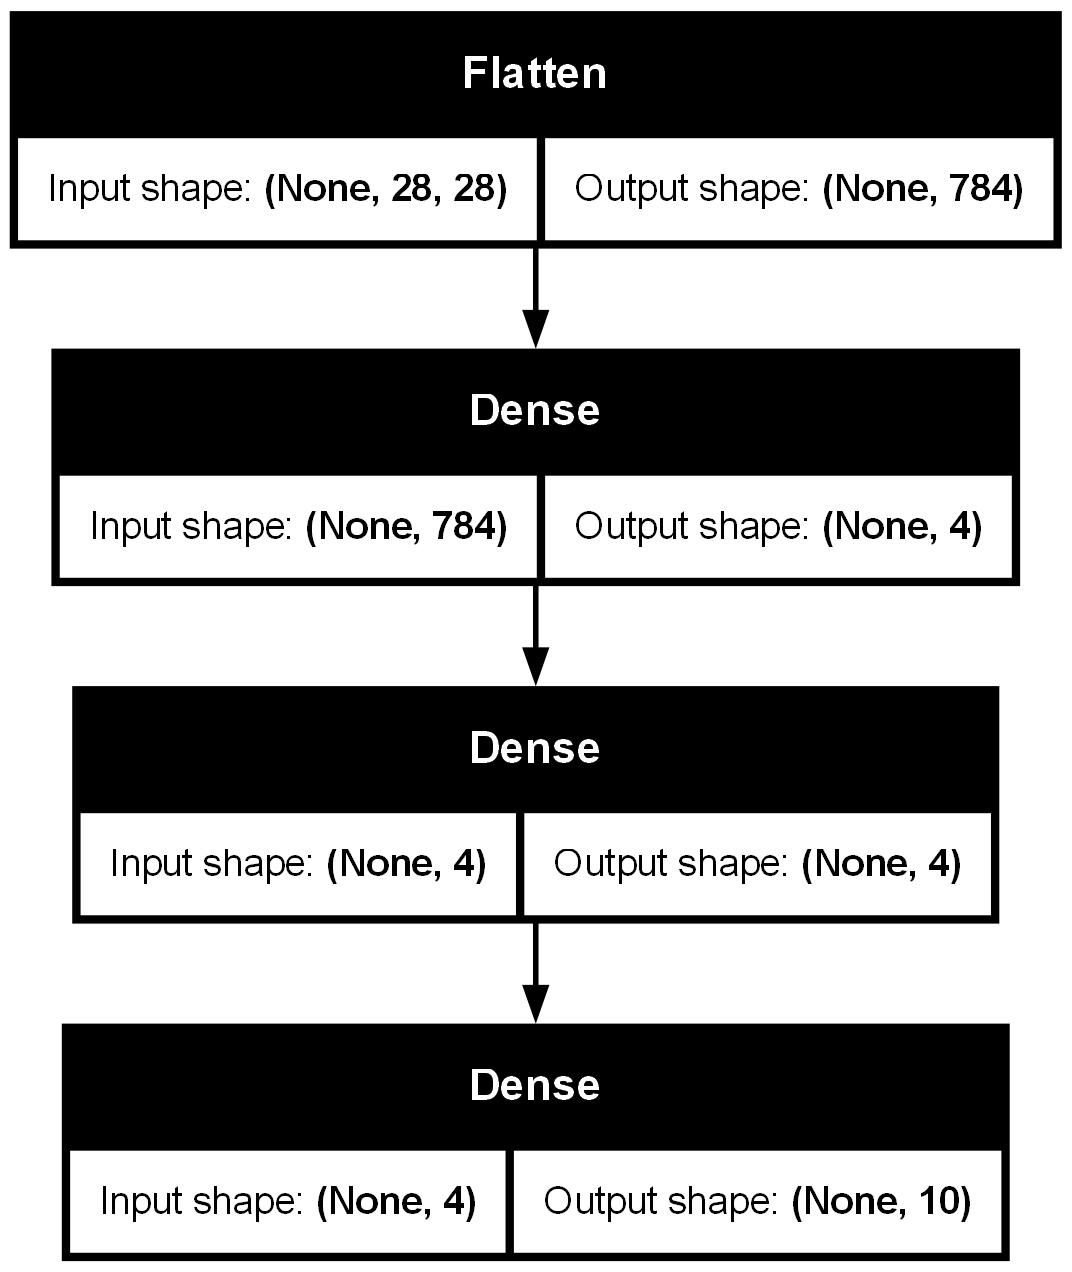

In [43]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True,)